In [31]:
from datasets.BingRGB import BingRGB
from utils import Config

In [32]:
config = Config("./config/config.yaml").config_dict
DatasetDownloader(**config.datasets.download.data).download()

In [33]:
data_module = BingRGB(**config.datasets)
data_module.setup()
data_module.prepare_data()
data_module.batch_size

Unzipping file...


Extracting files: 100%|██████████| 23799/23799 [00:00<00:00, 370598.15it/s]


2

In [34]:
train_loader = data_module.train_dataloader()
val_loader = data_module.val_dataloader()

In [35]:
print(len(train_loader))
print(len(train_loader.dataset))

4039
8078


In [36]:
a, b = next(iter(val_loader))

In [37]:
image = "./data/BingRGB/train/patch_002_001.png"
label = "./data/BingRGB/train/patch_002_001_gt.png"
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [38]:
lbl = np.array(Image.open(label))
img = np.array(Image.open(image))

In [39]:
np.unique(lbl)

array([1, 3, 4, 5], dtype=uint8)

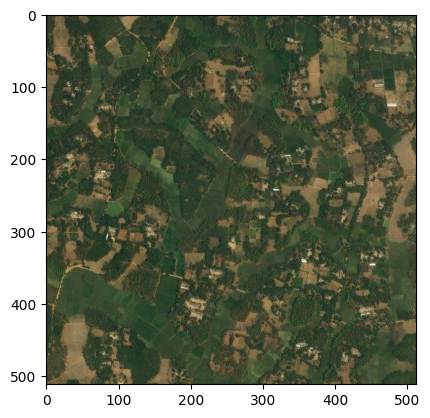

In [40]:
plt.imshow(img)

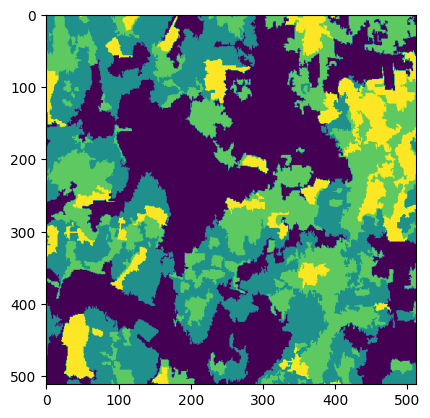

In [41]:
plt.imshow(lbl)

In [42]:
# Convert the encoded label image to a numpy array
label_array = lbl

# Create an empty binary label array of the same shape as the input image
binary_label_array = np.zeros_like(label_array)
lbl
input_image = Image.open(image)

In [43]:
# Loop over each pixel in the input image
for y in range(input_image.size[1]):
    for x in range(input_image.size[0]):
        # Check if the pixel is adjacent to a pixel of a different class
        current_class = label_array[y, x]
        for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            if (0 <= x+dx < input_image.size[0] and 0 <= y+dy < input_image.size[1] and
                    label_array[y+dy, x+dx] != current_class):
                binary_label_array[y, x] = 1
                break

# Define the kernel for dilation
dilation_radius = 5
kernel_size = dilation_radius * 2 + 1
kernel = np.zeros((kernel_size, kernel_size))

for y in range(kernel_size):
    for x in range(kernel_size):
        if (x - dilation_radius) ** 2 + (y - dilation_radius) ** 2 <= dilation_radius ** 2:
            kernel[y, x] = 1

# Dilate the binary mask
dilated_binary_label_array = np.zeros_like(binary_label_array)
for y in range(dilation_radius, input_image.size[1] - dilation_radius):
    for x in range(dilation_radius, input_image.size[0] - dilation_radius):
        if binary_label_array[y, x]:
            dilated_binary_label_array[y - dilation_radius:y + dilation_radius + 1,
                                       x - dilation_radius:x + dilation_radius + 1] = 1

# Convert the binary label array to a PIL image
binary_label = np.uint8(dilated_binary_label_array)

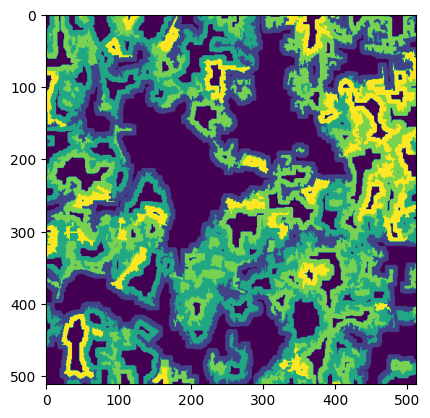

In [53]:
plt.imshow(binary_label * lbl)

In [44]:
# Apply the mask to the image
masked_image = np.zeros_like(img)
for i in range(3):
    masked_image[..., i] = img[..., i] * binary_label

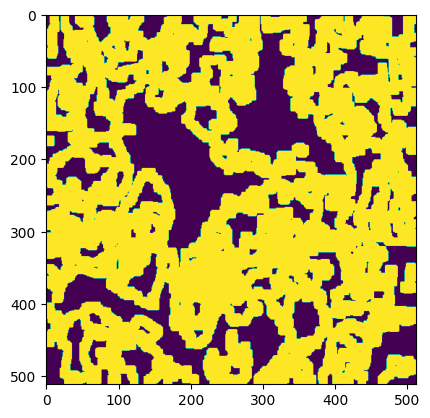

In [51]:
plt.imshow(binary_label)

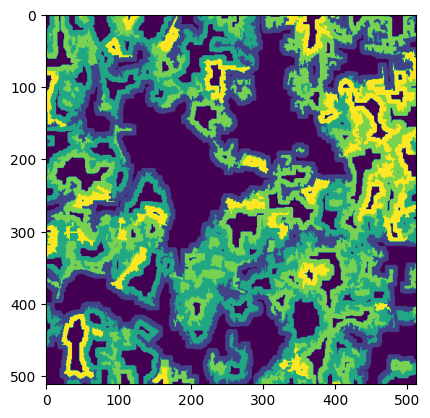

In [46]:
plt.imshow(lbl*binary_label)

(-0.5, 511.5, 511.5, -0.5)

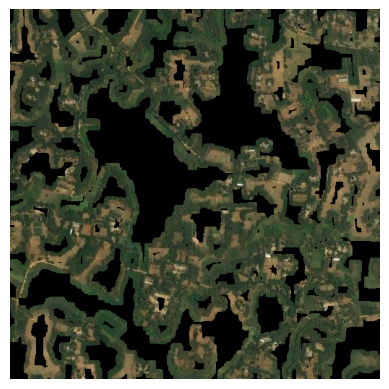

In [47]:
plt.imshow(masked_image)
plt.axis('off')